# Treating Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Loading a dataset from seaborn for demonstration

In [3]:
data =sns.load_dataset('healthexp')
data.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [5]:
data.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [6]:
data.isnull().mean()*100

Year               0.0
Country            0.0
Spending_USD       0.0
Life_Expectancy    0.0
dtype: float64

# OUTLIER TREATMENT

### BOXPLOT

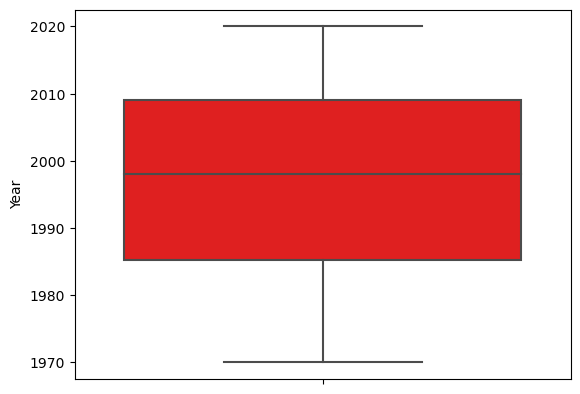

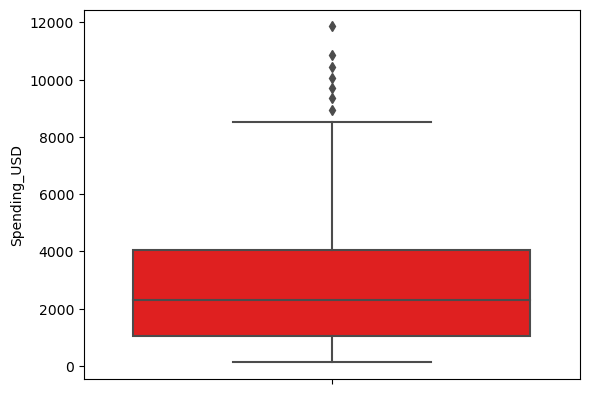

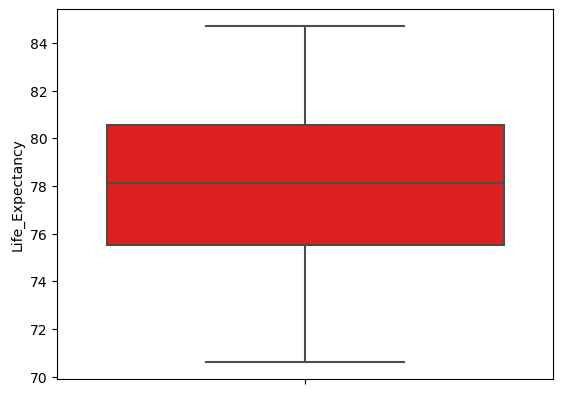

In [7]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i], color='red')
        plt.show()

# SETTING OUTLIER LIMITS:

In [8]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [11]:
for i in data.columns:
    if data[i].dtype != 'object':
        UL,LL = outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])
    

 # LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

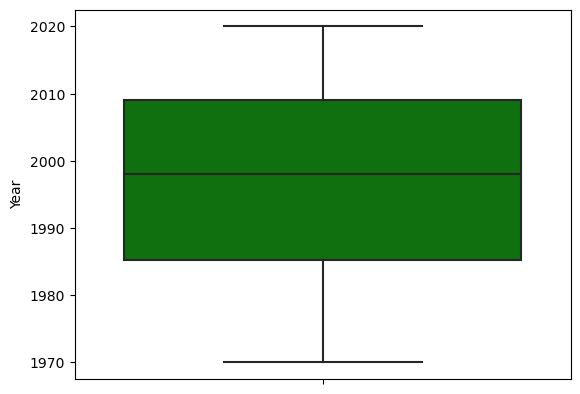

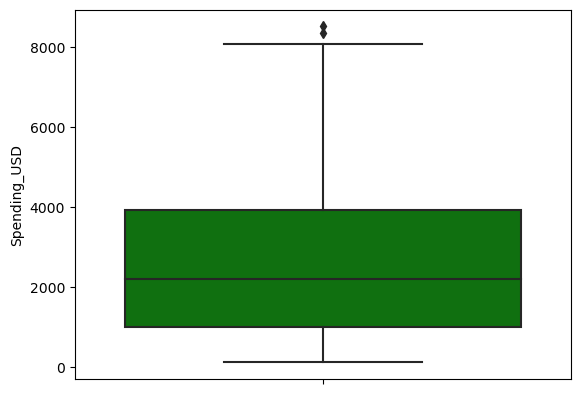

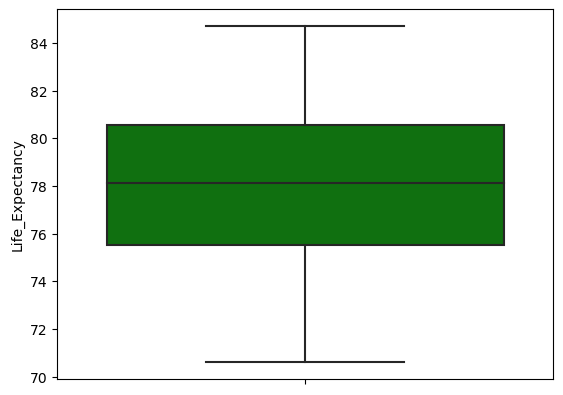

In [16]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i],color ="green")
        plt.show()